# 0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [ ]:
df_select["time_var"] = [i.second for i in df ["trans_date_trans_time"]]

<ipython-input-8-f12a6ef10a27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df ["trans_date_trans_time"]]


In [ ]:
dummies = pd.get_dummies(df_select["category"])
X = pd.concat([dummies, df_select[["amt", "city_pop", "time_var"]]], axis = 1)
y = df_select["is_fraud"]

In [ ]:
X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,25
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,33
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,53
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,17


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Traning data (Oversample)
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_ros_resampled, y__ros_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# Traning data (Undersample)
rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_rus_resampled, y__rus_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
# Traning data (SMOTE)
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic regression model with oversample data
log_reg_ros = LogisticRegression().fit(X_ros_resampled, y__ros_resampled)

In [ ]:
# Logistic regression model with undersample data
log_reg_rus = LogisticRegression().fit(X_rus_resampled, y__rus_resampled)

In [ ]:
# Logistic regression model with SMOTE data
log_reg_smote = LogisticRegression().fit(X_smote, y_smote)

# 4.) Test the three models

In [ ]:
# Evaluate the logistic regression model with oversample data
print("Testing set score of the logistic regression model with oversample data: {:.2f}".format(log_reg_ros.score(X_test, y_test)))

Testing set score of the logistic regression model with oversample data: 0.81


In [ ]:
# Evaluate the logistic regression model with undersample data
print("Testing set score of the logistic regression model with undersample data: {:.2f}".format(log_reg_rus.score(X_test, y_test)))

Testing set score of the logistic regression model with undersample data: 0.81


In [ ]:
# Evaluate the logistic regression model with SMOTE data
print("Testing set score of the logistic regression model with SMOTE data: {:.2f}".format(log_reg_smote.score(X_test, y_test)))

Testing set score of the logistic regression model with SMOTE data: 0.82


# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# According to the output, the logistic regression model with SMOTE data has the highest testing set score(0.82). Thus, the logistic regression model with SMOTE data performs best in out of sample metrics 

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-26-0df39e03bffc>:6: UserWarning: Legend does not support 'N' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Not Fraud", "Is Fraud")
<ipython-input-26-0df39e03bffc>:6: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Not Fraud", "Is Fraud")
<ipython-input-26-0df39e03bffc>:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Not Fraud", "Is Fraud")
<ipython-input-26-0df39e03bffc>:6: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: http://matplotlib

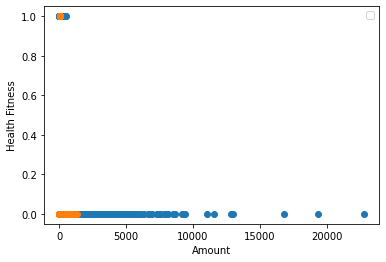

In [ ]:
# Graph before SMOTE
OG_data_temp = pd.concat([X_train, y_train], axis = 1)

plt.scatter(OG_data_temp[OG_data_temp["is_fraud"] == 0]["amt"], OG_data_temp[OG_data_temp["is_fraud"] == 0]["health_fitness"])
plt.scatter(OG_data_temp[OG_data_temp["is_fraud"] == 1]["amt"], OG_data_temp[OG_data_temp["is_fraud"] == 1]["health_fitness"])
plt.legend("Not Fraud", "Is Fraud")
plt.xlabel("Amount")
plt.ylabel("Health Fitness")
plt.show()

<ipython-input-27-462d99d55368>:6: UserWarning: Legend does not support 'N' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Not Fraud", "Is Fraud")
<ipython-input-27-462d99d55368>:6: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Not Fraud", "Is Fraud")
<ipython-input-27-462d99d55368>:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Not Fraud", "Is Fraud")
<ipython-input-27-462d99d55368>:6: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: http://matplotlib

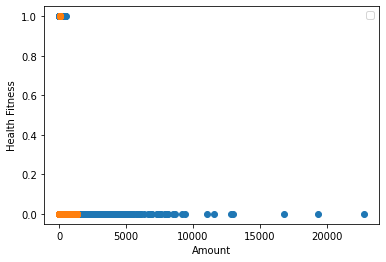

In [ ]:
# Graph after SMOTE
OG_data_temp_new = pd.concat([X_smote, y_smote], axis = 1)

plt.scatter(OG_data_temp_new[OG_data_temp_new["is_fraud"] == 0]["amt"], OG_data_temp_new[OG_data_temp_new["is_fraud"] == 0]["health_fitness"])
plt.scatter(OG_data_temp_new[OG_data_temp_new["is_fraud"] == 1]["amt"], OG_data_temp_new[OG_data_temp_new["is_fraud"] == 1]["health_fitness"])
plt.legend("Not Fraud", "Is Fraud")
plt.xlabel("Amount")
plt.ylabel("Health Fitness")
plt.show()